In [1]:
# Create a LSTM model to predict the next bit of a LFSR
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers


def create_data(
    num_samples=10000,
    initial_key1=None,
    initial_key2=None,
    initial_key3=None,
    ln=5,
    pred_len=30,
):
    if initial_key1 is None:
        initial_key1 = np.random.randint(0, 2, 10)
        print("Initial key 1: ", initial_key1)
    if initial_key2 is None:
        initial_key2 = np.random.randint(0, 2, 11)
        print("Initial key 2: ", initial_key2)
    # if initial_key3 is None:
    #     initial_key3 = np.random.randint(0, 2, 12)
    #     print("Initial key 3: ", initial_key3)

    # data = initial_key
    key1 = initial_key1
    key2 = initial_key2
    # key3 = initial_key3
    x = []
    y = []
    data = []
    st = set()
    for _ in range(num_samples):
        nxt1 = key1[0] ^ key1[7]
        nxt2 = key2[0] ^ key2[9]
        # nxt3 = key3[0] ^ key3[6] ^ key3[8] ^ key3[11]
        data.append(nxt1 ^ nxt2)
        if len(data) >= ln + 1:
            x.append(data[-(ln + 1) : -(1)])
            st.add(tuple(data[-(ln + 1) : -(1)]))
            y.append(data[-1])
        key1 = np.roll(key1, -1)
        key2 = np.roll(key2, -1)
        # key3 = np.roll(key3, -1)
        key1[-1] = nxt1
        # key3[-1] = nxt3
        key2[-1] = nxt2
    print("Unique samples: ", len(st))
    return np.array(x), np.array(y)

2024-05-06 21:32:12.553431: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
ln = 10 + 11
X, Y = create_data(
    100000,
    ln=ln,
    # initial_key1=np.array([1, 0, 1, 1, 1]),
    # initial_key2=np.array([1, 1, 1, 0, 1]),
)
X_train, Y_train = X[: 10000 - ln], Y[: 10000 - ln]
X_test, Y_test = X[10000 - ln :], Y[10000 - ln :]
st = set()
for x in X_train:
    st.add(tuple(x))
print("Unique samples in training data: ", len(st))
print(X_train.shape, Y_train.shape)

Initial key 1:  [0 1 0 0 0 0 1 1 1 1]
Initial key 2:  [1 0 1 0 0 1 1 1 1 0 0]
Unique samples:  99979
Unique samples in training data:  9979
(9979, 21) (9979,)


In [5]:
model = tf.keras.models.Sequential(
    [
        # tf.keras.layers.GRU(300, input_shape=(ln, 1)),
        # tf.keras.layers.SimpleRNN(300, input_shape=(ln, 1), activation="relu"),
        tf.keras.layers.Embedding(2, 5, input_length=21),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1000, activation="relu"),
        # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, input_shape=(ln, 1))),
        # tf.keras.layers.LSTM(100, input_shape=(ln, 1), activation="sigmoid", recurrent_activation="sigmoid"),
        # tf.keras.layers.Dense(100, activation="relu"),
        # tf.keras.layers.Dense(10, activation="relu"),
        # tf.keras.layers.Conv1D(100, 3, 1, input_shape=(ln, 1), activation="relu"),
        # tf.keras.layers.Conv1D(200, 3, 1, activation="relu"),
        # tf.keras.layers.Conv1D(400, 3, 1, activation="relu"),
        # tf.keras.layers.MaxPooling1D(3),
        # tf.keras.layers.Flatten(),
        # tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["binary_accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 21, 5)             10        
                                                                 
 flatten (Flatten)           (None, 105)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)              106000    
                                                                 
 dense_3 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 107011 (418.01 KB)
Trainable params: 107011 (418.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# X_train = np.expand_dims(X_train, -1)
# X_test = np.expand_dims(X_test, -1)
model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))
# model.save("lfsr_model.h5")

Epoch 1/100
312/312 [==============================] - 4s 12ms/step - loss: 0.6936 - binary_accuracy: 0.4976 - val_loss: 0.6932 - val_binary_accuracy: 0.5015
Epoch 2/100
312/312 [==============================] - 4s 13ms/step - loss: 0.6934 - binary_accuracy: 0.4995 - val_loss: 0.6932 - val_binary_accuracy: 0.4983
Epoch 3/100
312/312 [==============================] - 4s 13ms/step - loss: 0.6927 - binary_accuracy: 0.5138 - val_loss: 0.6975 - val_binary_accuracy: 0.5014
Epoch 4/100
312/312 [==============================] - 4s 12ms/step - loss: 0.6925 - binary_accuracy: 0.5147 - val_loss: 0.6968 - val_binary_accuracy: 0.5003
Epoch 5/100
312/312 [==============================] - 4s 12ms/step - loss: 0.6914 - binary_accuracy: 0.5253 - val_loss: 0.6951 - val_binary_accuracy: 0.4993
Epoch 6/100
312/312 [==============================] - 4s 14ms/step - loss: 0.6892 - binary_accuracy: 0.5386 - val_loss: 0.6949 - val_binary_accuracy: 0.5023
Epoch 7/100
312/312 [==============================]

KeyboardInterrupt: 

Initial key 1:  [1 1 1 0 0]
Initial key 2:  [1 0 0 1 1]
Epoch 1/100
25/25 [==============================] - 1s 18ms/step - loss: 0.7013 - accuracy: 0.4969 - val_loss: 0.6961 - val_accuracy: 0.5030
Epoch 2/100
 1/25 [>.............................] - ETA: 0s - loss: 0.7047 - accuracy: 0.5000

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 0s 14ms/step - loss: 0.6957 - accuracy: 0.4918 - val_loss: 0.6928 - val_accuracy: 0.5082
Epoch 3/100
25/25 [==============================] - 0s 12ms/step - loss: 0.6932 - accuracy: 0.5270 - val_loss: 0.6949 - val_accuracy: 0.5063
Epoch 4/100
25/25 [==============================] - 0s 15ms/step - loss: 0.6956 - accuracy: 0.5082 - val_loss: 0.6925 - val_accuracy: 0.5070
Epoch 5/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6940 - accuracy: 0.5145 - val_loss: 0.6936 - val_accuracy: 0.5111
Epoch 6/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6939 - accuracy: 0.5170 - val_loss: 0.6941 - val_accuracy: 0.5063
Epoch 7/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6926 - accuracy: 0.5094 - val_loss: 0.6926 - val_accuracy: 0.5165
Epoch 8/100
25/25 [==============================] - 0s 11ms/step - loss: 0.6921 - accuracy: 0.5170 - val_loss: 0.6924 - val_accuracy: 0.5179
Epoch 9/100
25/25 

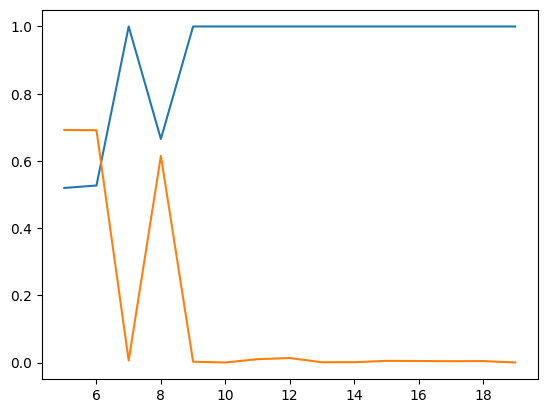

Initial key 1:  [0 0 1 0 1]
Initial key 2:  [1 0 0 0 0]
Epoch 1/100
1/1 [==============================] - 1s 842ms/step - loss: 0.8089 - accuracy: 0.0000e+00 - val_loss: 0.6940 - val_accuracy: 0.4948
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.6795 - accuracy: 1.0000

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 254ms/step - loss: 0.6795 - accuracy: 1.0000 - val_loss: 0.6953 - val_accuracy: 0.4994
Epoch 3/100
1/1 [==============================] - 0s 272ms/step - loss: 0.5695 - accuracy: 1.0000 - val_loss: 0.6997 - val_accuracy: 0.5011
Epoch 4/100
1/1 [==============================] - 0s 226ms/step - loss: 0.4758 - accuracy: 1.0000 - val_loss: 0.7070 - val_accuracy: 0.4963
Epoch 5/100
1/1 [==============================] - 0s 224ms/step - loss: 0.3960 - accuracy: 1.0000 - val_loss: 0.7171 - val_accuracy: 0.5008
Epoch 6/100
1/1 [==============================] - 0s 226ms/step - loss: 0.3291 - accuracy: 1.0000 - val_loss: 0.7296 - val_accuracy: 0.5008
Epoch 7/100
1/1 [==============================] - 0s 230ms/step - loss: 0.2740 - accuracy: 1.0000 - val_loss: 0.7444 - val_accuracy: 0.5008
Epoch 8/100
1/1 [==============================] - 0s 227ms/step - loss: 0.2287 - accuracy: 1.0000 - val_loss: 0.7611 - val_accuracy: 0.5008
Epoch 9/100
1/1 [========

KeyboardInterrupt: 

[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]
[[0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
[[0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


[1 1 0 0 0 1 0 1 0 0]
[0 1 1 0 0 0 1 0 1 0]
[0 0 1 1 0 0 0 1 0 1]
[0 0 0 1 1 1 0 1 1 0]
[1 1 0 0 1 0 1 0 1 1]
[1 0 1 0 0 1 0 0 0 1]
[0 1 0 1 0 1 1 1 0 0]
[0 0 1 0 1 0 1 1 1 0]
[1 1 0 1 0 0 0 1 1 1]
[0 1 1 0 1 1 0 1 1 1]
[1 1 1 1 0 1 1 1 1 1]


(10, 10) (10, 1)
[[1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.22044605e-16]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]]
[[ 3.33333333e-01]
 [-5.55111512e-16]
 [ 6.66666667e-01]
 [ 3.33333333e-01]
 [-3.33333333e-01]
 [ 3.33333333e-01]
 [ 1.11022302e-16]
 [ 3.33333333e-01]
 [ 3.33333333e-01]
 [-3.33333333e-01]]


1111001100


(array([0, 1, 5, 7]),)
(array([1, 2, 6, 8]),)
(array([2, 3, 7, 9]),)
(array([3, 4, 5, 7, 8]),)
(array([1, 3, 5, 6, 7]),)
(array([2, 4, 6, 7, 8]),)
Output
(array([0, 1, 2, 3, 5, 6, 7, 8, 9]),)


[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]


[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1]
[0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1]
[0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0]
[0 0 0 0

000000000000000000001000100
000000000000000000011001101
000000000000000000101010110
000000000000000000111011111
000000000000000001001100000
000000000000000001011101001
000000000000000001101110010
000000000000000001111111011
000000000000000010000001100
000000000000000010010000101
000000000000000010100011110
000000000000000010110010111
000000000000000011000101000
000000000000000011010100001
000000000000000011100111010
000000000000000011110110011
000000000000000100001011101
000000000000000100011010100
000000000000000100101001111
000000000000000100111000110
000000000000000101001111001
000000000000000101011110000
000000000000000101101101011
000000000000000101111100010
000000000000000110000010101
000000000000000110010011100
000000000000000110100000111
000000000000000110110001110
000000000000000111000110001
000000000000000111010111000
000000000000000111100100011
000000000000000111110101010
000000000000001000001110110
000000000000001000011111111
000000000000001000101100100
00000000000000100011

KeyboardInterrupt: 